In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from calendar import month_name
import matplotlib.patches as patches

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

#### draw line plot function

In [57]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (12,7))
    ax.plot(df['value'], color = 'red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freCodeCamp Forum Page Views 5/2016-12/2019')
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

### draw bar plot

In [52]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.resample('ME').mean()
    
    # Draw bar plot
    bar_width = 0.8 / 12
    fig, ax = plt.subplots(figsize = (10,14))
    for i, j in enumerate(range(1,13)):
       offset = (6 - j) * bar_width  + bar_width / 2
       plt.bar(df_bar[df_bar.index.month == j].index.year - offset,  df_bar[df_bar.index.month == j]['value'], width = bar_width,  label= month_name[j])
    for _ in range(48 - len(ax.patches)):
        rect = patches.Rectangle((0, 0), 0, 0, fill=False, visible=False)
        ax.add_artist(rect)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_xticks(df_bar.index.year.unique())
    ax.legend(title='Months')
    #save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

### draw box plot

In [53]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(22,12))
    sns.boxplot(data = df_box, x = 'year', y = 'value', hue = 'year', palette = 'Set1', legend = False, flierprops={"markerfacecolor": "black"}, ax = ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')

    sns.boxplot(data = df_box, x = 'month', y = 'value', hue = 'month',  palette = 'Set1', legend = False, flierprops={"markerfacecolor": "black"}, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    fig.savefig('box_plot.png')
    return fig

### llamados a las funciones

Daily freCodeCamp Forum Page Views 5/2016-12/2019
Date
Page Views
1238


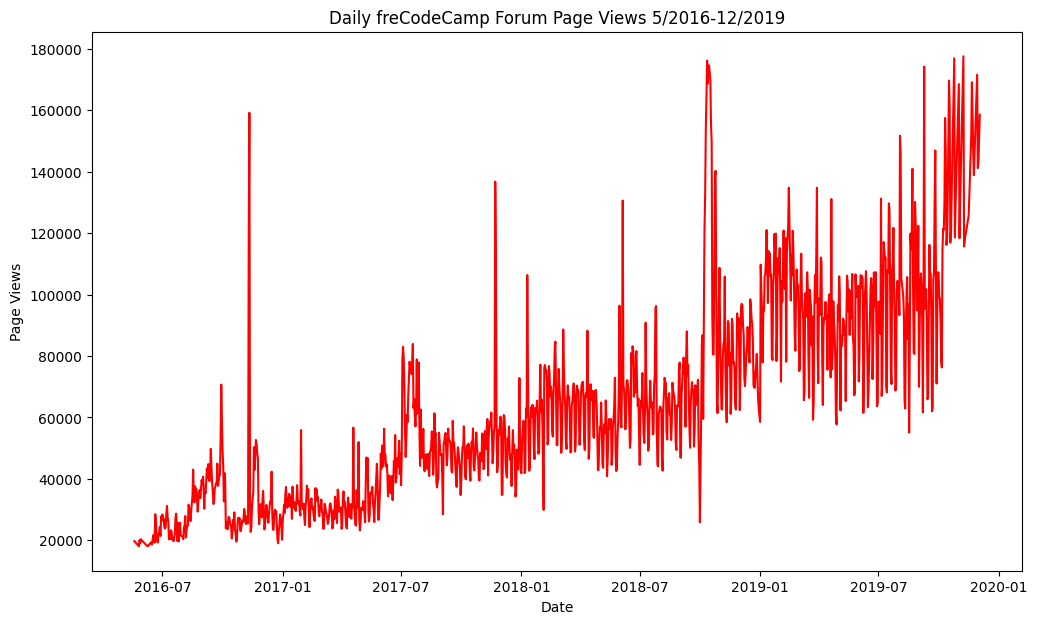

In [54]:
draw_line_plot();

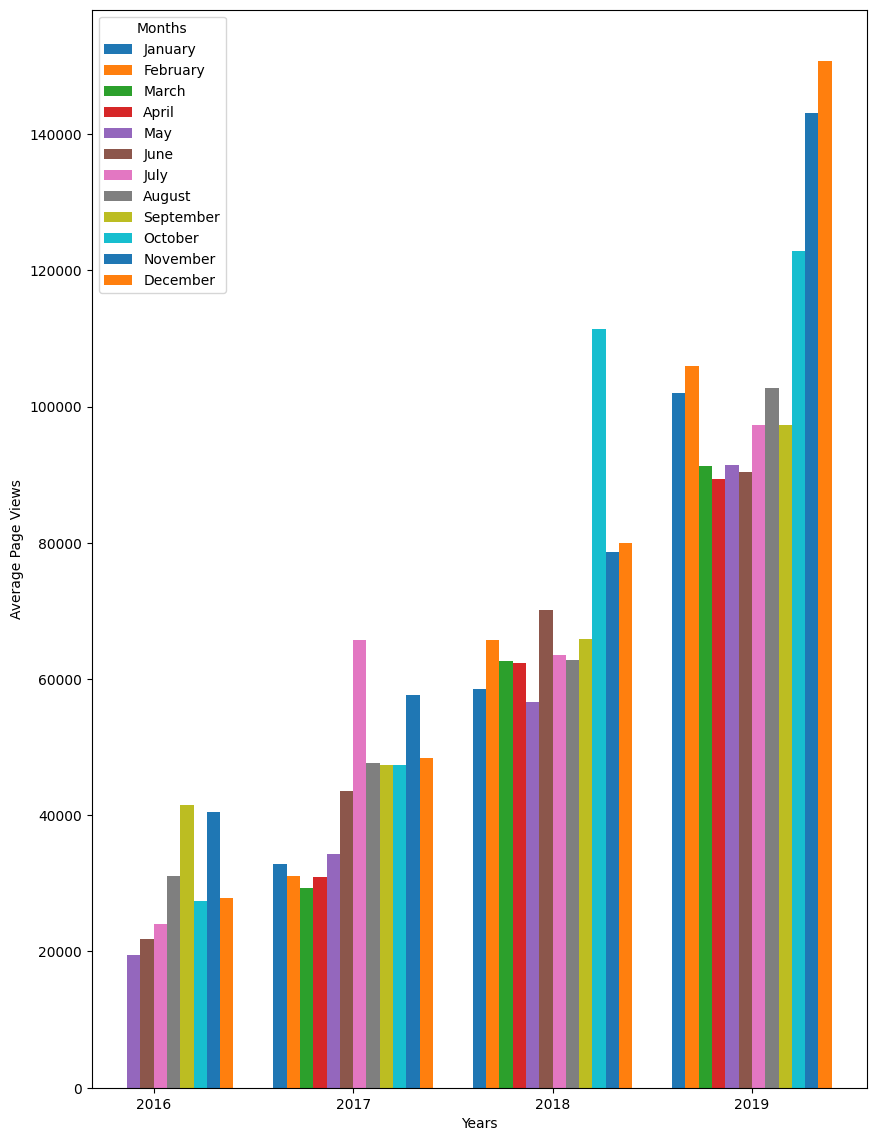

In [55]:
draw_bar_plot();

C:\Users\Mario Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mario Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Mario Alberto\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mario Alberto\AppData

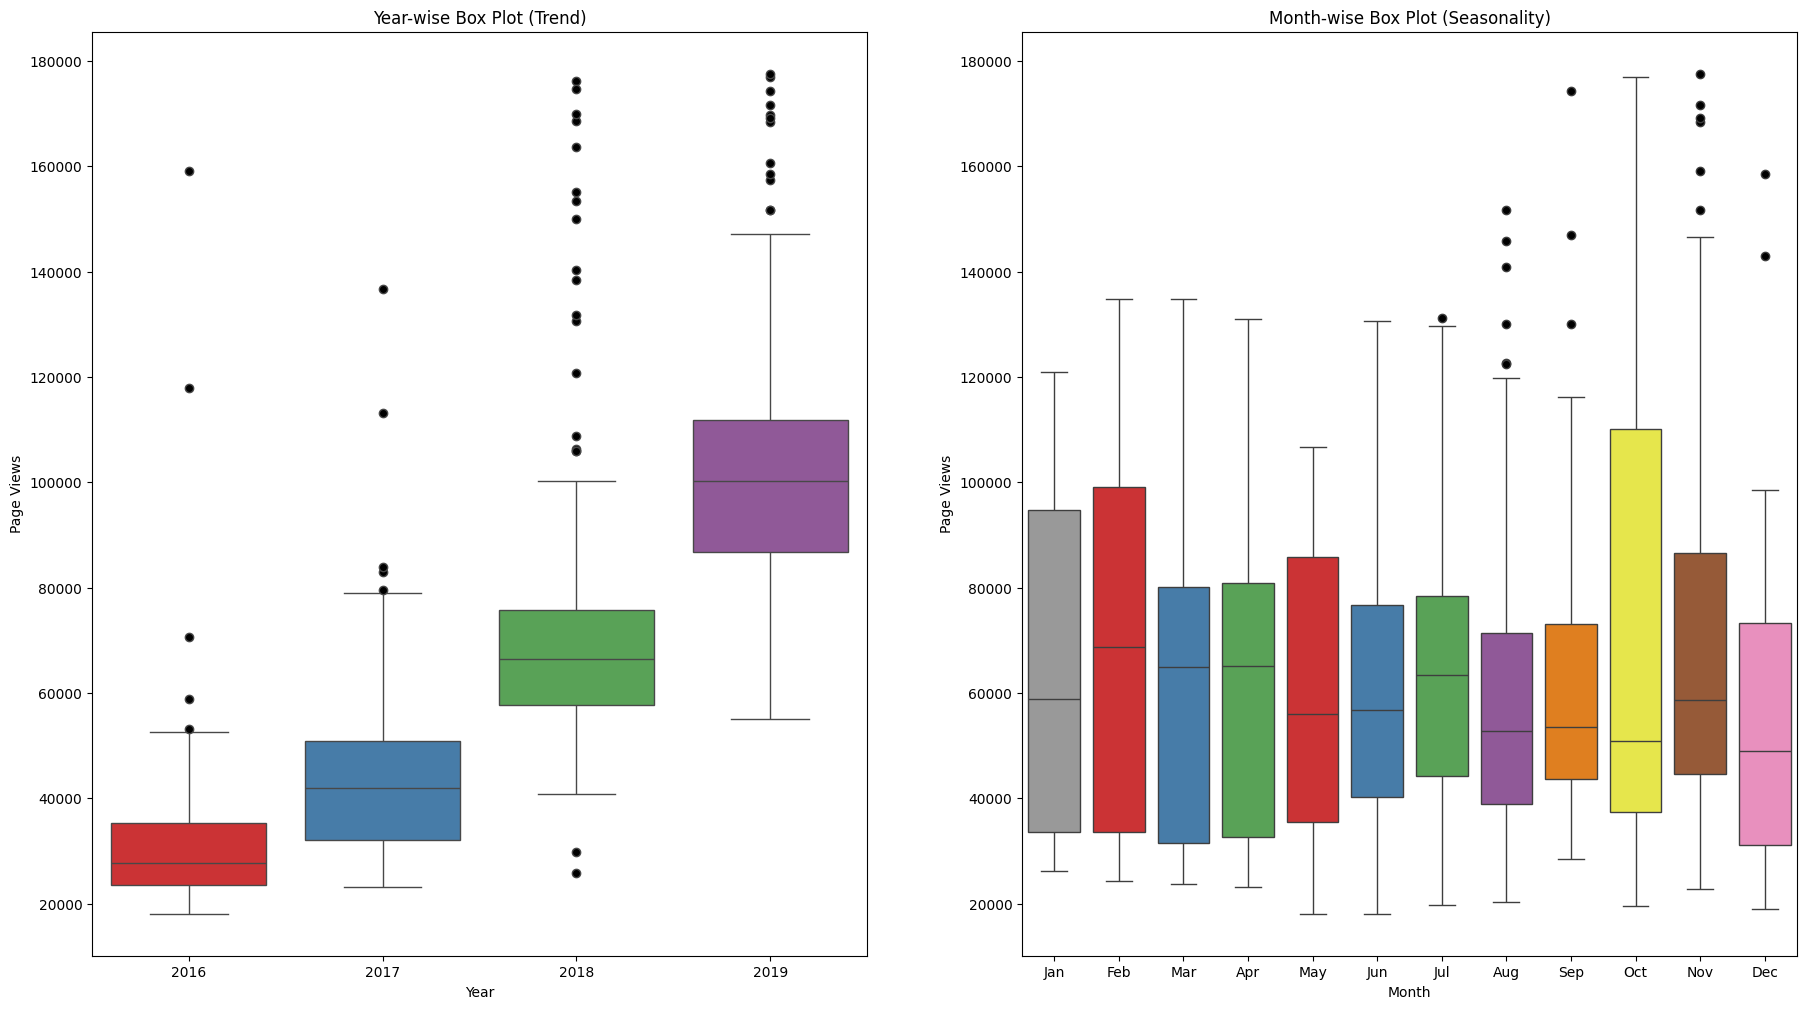

In [56]:
draw_box_plot();

### Pruebas del test module

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


In [11]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [19]:
df.count(numeric_only=True).iloc[0] # número de elementos no nulos de la columna

1238

In [18]:
ax.get_title()

NameError: name 'ax' is not defined